In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn import preprocessing
from scipy import stats
from sklearn.linear_model import LinearRegression

In [2]:
read_usd = pd.read_excel (r'ds\usd.xlsx', sheet_name='RC')
read_usd.to_csv(r'ds\usd.csv', index = None, header=True)
df = pd.DataFrame(pd.read_csv(r'ds\usd.csv'))
df = pd.DataFrame(df['curs'].values, columns = ['usd'])

read_euro = pd.read_excel (r'ds\euro.xlsx', sheet_name='RC')
read_euro.to_csv(r'ds\euro.csv', index = None, header=True)
df['euro'] = pd.DataFrame(pd.read_csv(r'ds\euro.csv')).values

read_cad = pd.read_excel (r'ds\cad.xlsx', sheet_name='RC')
read_cad.to_csv(r'ds\cad.csv', index = None, header=True)
df['cad'] = pd.DataFrame(pd.read_csv(r'ds\cad.csv')).values
df

usd     euro      cad
0     71.4876  82.8112  57.6141
1     71.4783  82.9577  57.6717
2     71.0863  82.1687  57.3786
3     70.5200  82.2898  57.0920
4     70.5207  81.8393  56.9956
...       ...      ...      ...
1003  58.3151  68.3861  46.5070
1004  57.7612  67.5344  45.9005
1005  57.5811  67.7787  46.1794
1006  57.7832  67.9357  46.3006
1007  57.9375  67.9839  46.2907

[1008 rows x 3 columns]

In [3]:
df.to_excel(r'ds\usd_euro_cad.xlsx', engine='xlsxwriter')

In [4]:
#============================================================
#                     №3
#============================================================

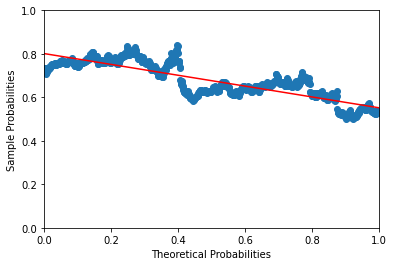

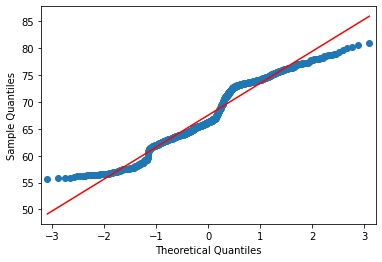

In [5]:
scaler_std = preprocessing.StandardScaler()
scaler = preprocessing.MinMaxScaler()


usd_ = scaler.fit_transform(df[['usd']])

probplot_usd_ = sm.ProbPlot(usd_)
probplot_usd_.ppplot(line = 'r') # стандартизованные значения

probplot_usd = sm.ProbPlot(df['usd'])
probplot_usd.qqplot(line='r') # изначальные значения
plt.show() 

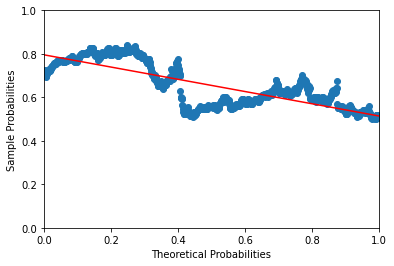

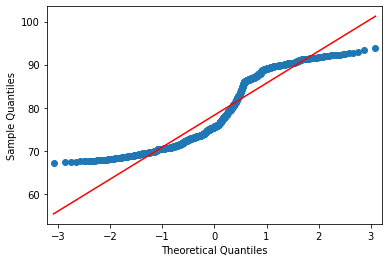

In [6]:
euro_ = scaler.fit_transform(df[['euro']])
probplot_euro_ = sm.ProbPlot(euro_)
probplot_euro_.ppplot(line = 'r') # стандартизованные значения

probplot_euro = sm.ProbPlot(df['euro'])
probplot_euro.qqplot(line='r') # изначальные значения
plt.show() 

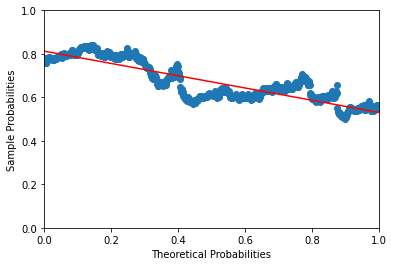

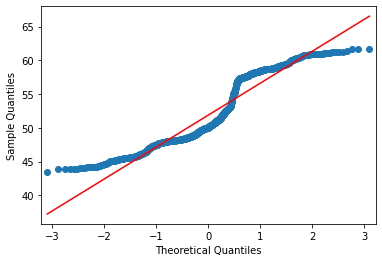

In [7]:
cad_ = scaler.fit_transform(df[['cad']])
probplot_cad_ = sm.ProbPlot(cad_)
probplot_cad_.ppplot(line = 'r') # стандартизованные значения

probplot_cad = sm.ProbPlot(df['cad'])
probplot_cad.qqplot(line='r') # изначальные значения
plt.show() 

In [8]:
#============================================================
#                     №4
#============================================================

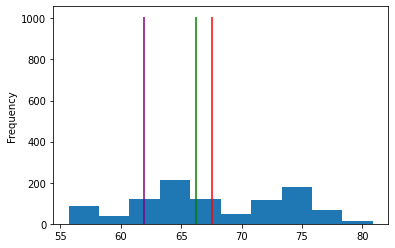

In [9]:
fig, ax = plt.subplots()
ax.vlines(df['usd'].mean(),0, df['usd'].size,colors = 'Red')
ax.vlines(df['usd'].median(),0, df['usd'].size,colors = 'Green')
ax.vlines(df['usd'].mode()[0],0, df['usd'].size,colors = 'Purple')
df['usd'].plot.hist()
plt.show()

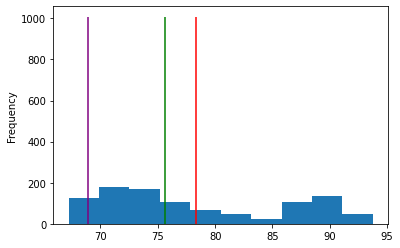

In [10]:
fig, ax = plt.subplots()
ax.vlines(df['euro'].mean(),0, df['euro'].size,colors = 'Red')
ax.vlines(df['euro'].median(),0, df['euro'].size,colors = 'Green')
ax.vlines(df['euro'].mode()[0],0, df['euro'].size,colors = 'Purple')
df['euro'].plot.hist()
plt.show()

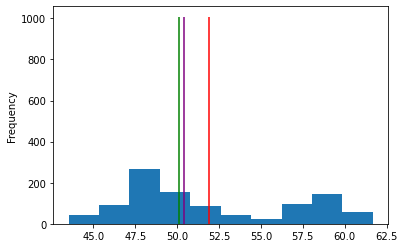

In [11]:
fig, ax = plt.subplots()
ax.vlines(df['cad'].mean(),0, df['cad'].size,colors = 'Red')
ax.vlines(df['cad'].median(),0, df['cad'].size,colors = 'Green')
ax.vlines(df['cad'].mode()[0],0, df['cad'].size,colors = 'Purple')
df['cad'].plot.hist()
plt.show()

In [12]:
#============================================================
#                     №5
#   Так как каждый из изучаемых признаков содержит
#   <2000 наблюдений, используем кр. Шапиро-Уилка
#============================================================

In [13]:
arr = []
for e in list(df.columns):
    w = stats.shapiro(list(df['{}'.format(e)]))
    arr.append(list(w))
arr = np.array(arr)   

In [14]:
pd.DataFrame(arr.T, columns = ['usd', 'euro', 'cad'], index = ['W', 'p-value'])

usd          euro           cad
W        9.549550e-01  8.938885e-01  9.039090e-01
p-value  4.843933e-17  8.939512e-26  1.152255e-24

In [15]:
#============================================================
#                     №6
#============================================================

<AxesSubplot:>

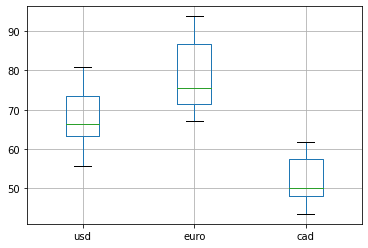

In [16]:
df.boxplot()

In [17]:
df_IQR = pd.DataFrame()
for e in list(df.columns):
    currency = '{}'.format(e)
    Q1 =  df[currency].quantile(0.25)
    Q3 = df[currency].quantile(0.75)
    #IQR = Q3 - Q1
    #print(currency)
    temp = pd.DataFrame(df[(df[currency] > Q1) & (df[currency] < Q3)])[currency]
    df_IQR[currency] = temp.values    

In [18]:
df_IQR

usd     euro      cad
0    71.4876  82.8112  57.3786
1    71.4783  82.9577  57.0920
2    71.0863  82.1687  56.9956
3    70.5200  82.2898  56.2397
4    70.5207  81.8393  56.1996
..       ...      ...      ...
499  63.6175  75.7507  49.3928
500  64.0683  76.7569  48.8557
501  63.4838  79.2839  49.2743
502  63.4860  76.8522  50.8030
503  64.0626  71.8847  49.1450

[504 rows x 3 columns]

In [19]:
arr_ = []
for e in list(df_IQR.columns):
    w = stats.shapiro(list(df['{}'.format(e)]))
    arr_.append(list(w))
arr_ = np.array(arr_)  

In [20]:
pd.DataFrame(arr.T, columns = ['usd', 'euro', 'cad'], index = ['W', 'p-value'])

usd          euro           cad
W        9.549550e-01  8.938885e-01  9.039090e-01
p-value  4.843933e-17  8.939512e-26  1.152255e-24

In [21]:
#============================================================
#                     №7
#============================================================

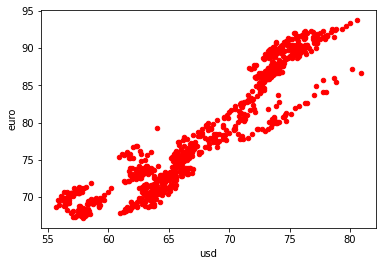

In [22]:
df.plot.scatter(x = 'usd', y = 'euro', c = 'Red')
plt.show();

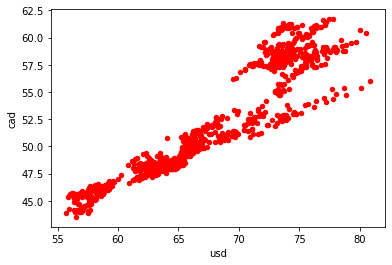

In [23]:
df.plot.scatter(x = 'usd', y = 'cad', c = 'Red')
plt.show();

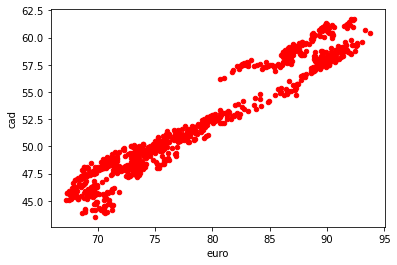

In [24]:
df.plot.scatter(x = 'euro', y = 'cad', c = 'Red')
plt.show();

In [25]:
#============================================================
#                     №8
#============================================================

In [26]:
df.corr(method = 'pearson')

usd      euro       cad
usd   1.000000  0.934661  0.934516
euro  0.934661  1.000000  0.969449
cad   0.934516  0.969449  1.000000

In [27]:
df.corr(method = 'kendall')

usd      euro       cad
usd   1.000000  0.788882  0.809799
euro  0.788882  1.000000  0.807453
cad   0.809799  0.807453  1.000000

In [28]:
df.corr(method = 'spearman')

usd      euro       cad
usd   1.000000  0.935655  0.949997
euro  0.935655  1.000000  0.951107
cad   0.949997  0.951107  1.000000

In [29]:
#============================================================
#                     №9
#============================================================

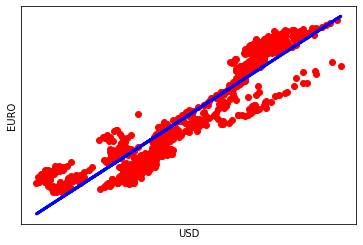

R^2 = 0.87359


In [30]:
#usd,euro
x = df['usd'].values.reshape(-1, 1)
y = df['euro'].values.reshape(-1, 1)
reg = LinearRegression().fit(x,y)
plt.scatter(x, y,  color='red')
plt.plot(x, reg.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.xlabel("USD")
plt.ylabel("EURO")
plt.show()
print("R^2 = " + str(round(reg.score(x,y),5)))

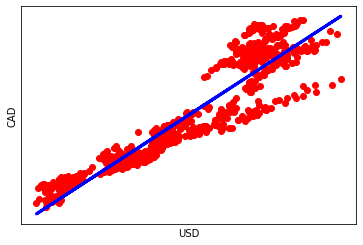

R^2 = 0.87332


In [31]:
#usd,cad
x = df['usd'].values.reshape(-1, 1)
y = df['cad'].values.reshape(-1, 1)
reg = LinearRegression().fit(x,y)
plt.scatter(x, y,  color='red')
plt.plot(x, reg.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.xlabel("USD")
plt.ylabel("CAD")
plt.show()
print("R^2 = " + str(round(reg.score(x,y),5)))

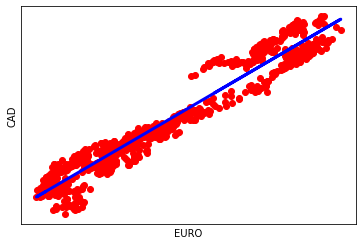

R^2 = 0.93983


In [32]:
#euro,cad
x = df['euro'].values.reshape(-1, 1)
y = df['cad'].values.reshape(-1, 1)
reg = LinearRegression().fit(x,y)
plt.scatter(x, y,  color='red')
plt.plot(x, reg.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.xlabel("EURO")
plt.ylabel("CAD")
plt.show()
print("R^2 = " + str(round(reg.score(x,y),5)))

In [45]:
df['euro'].values.reshape(-1,1)

array([[82.8112],
       [82.9577],
       [82.1687],
       ...,
       [67.7787],
       [67.9357],
       [67.9839]])